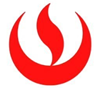

<h3 align="center">Inteligencia Artificial - WS7A</h3>

## (1) Redes Recurrentes Hopfield - Patrones de entrada aleatorios

Las redes de Hopfield se pueden analizar matemáticamente. 

En este ejercicio de Python nos enfocaremos en la visualización y simulación para desarrollar nuestra intuición sobre la dinámica de Hopfield.

Se proporciona un par de funciones para crear patrones fácilmente, almacenarlos en la red y visualizar la dinámica de la red. 

Utilizar los módulos **hopfield_network.network**, **hopfield_network.pattern_tools** y **hopfield_network.plot_tools** para aprender los elementos básicos de esta red.

Pasos a seguir:

* Ejecutar el siguiente código. 

* Leer los comentarios en línea y consultar la documentación de ser necesario.

* Los patrones y los píxeles alterados se eligen al azar. Por lo tanto, el resultado cambia cada vez que ejecuta este código. 

* Ejecutar varias veces y cambiar algunos parámetros como **nr_patterns** y **nr_of_flips**.

#### 1. Importar librerias e inicializar patrones de entrada

Instalar previamente la libreria neurodynex3

pip install neurodynex3

In [2]:
%matplotlib inline
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

In [3]:
# crea una instancia de la clase HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

In [4]:
# instanciar una fábrica de patrones
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

In [6]:
# crea un patrón de tablero de ajedrez y agrégalo a la lista de patrones
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

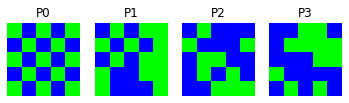

In [7]:
# agregue patrones aleatorios a la lista
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)

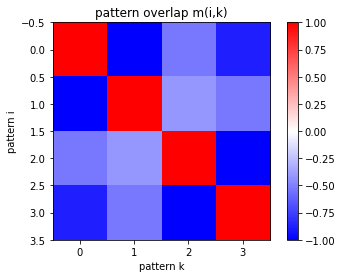

In [8]:
# ¿Qué tan similares son los patrones aleatorios y el tablero de ajedrez? Verifique las superposiciones
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

In [9]:
# deje que la red hopfield "aprenda" los patrones. Nota: ¡no se almacenan
# explícitamente, pero solo se actualizan los pesos de red!
hopfield_net.store_patterns(pattern_list)

In [10]:
# crea una versión ruidosa de un patrón y úsala para inicializar la red
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

In [11]:
# a partir de este estado inicial, deje que la dinámica de la red evolucione.
states = hopfield_net.run_with_monitoring(nr_steps=4)

In [12]:
# cada estado de la red es un vector. 
# modifíquelo con la misma forma que se utilizó para crear los patrones.
states_as_patterns = factory.reshape_patterns(states)

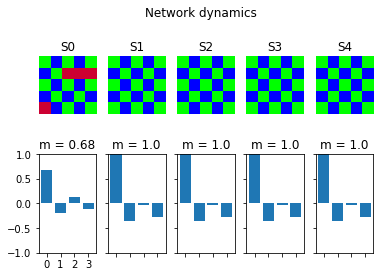

In [13]:
# trazar los estados de la red
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Fuente: https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html